In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_list = ['./log/index_'+file+'.csv' for file in [
    "msg_QNN_Jan25_1710_{}.log".format(i) for i in range(12)
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]

NameError: name 'pd' is not defined

In [48]:
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] + df['op_cost']
    print file_list[i]

./log/index_msg_Jan24_1700_QNN_0.log.csv
./log/index_msg_Jan24_1700_QNN_1.log.csv
./log/index_msg_Jan24_1700_QNN_2.log.csv
./log/index_msg_Jan24_1700_QNN_3.log.csv
./log/index_msg_Jan24_1700_QNN_4.log.csv
./log/index_msg_Jan24_1700_QNN_5.log.csv


In [50]:
ts_name = ['targetQ']+['noTarget']*5
styles = ['-', '-', '-','-', '-']*2
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

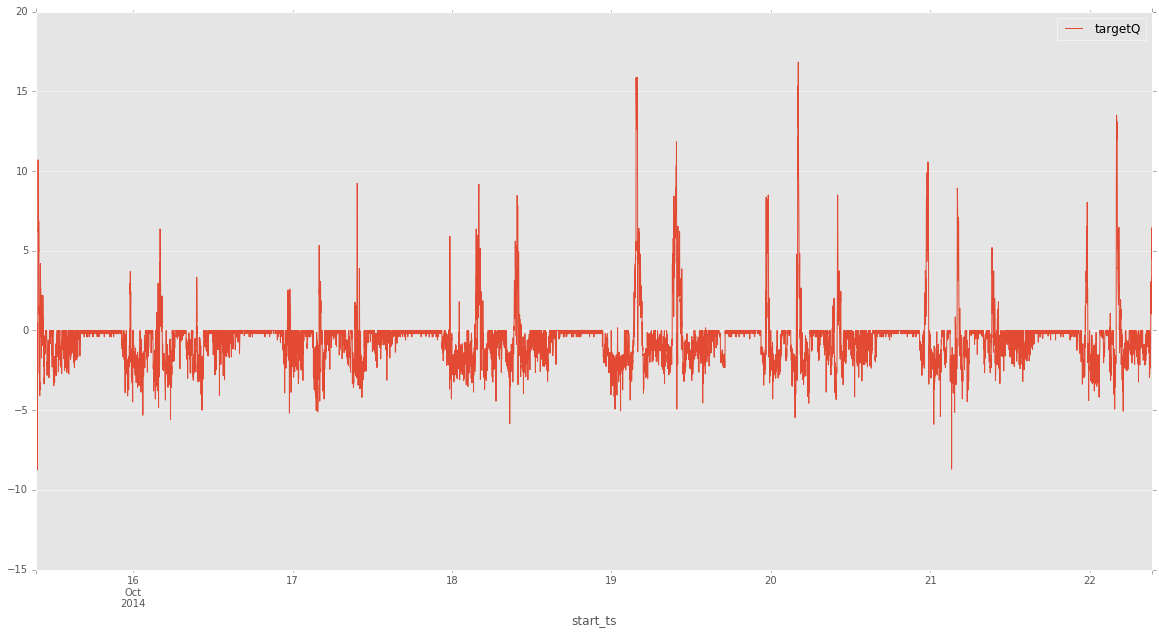

In [52]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate([df_list[2]]):
#     ts = df.req_generated
    ts = df.total_reward.resample('1Min')
#     ts = df.reward_scaling.resample('1Min')
#     step = (ts.index-ts.index[0])/delta+1
#     ts = df.tr_reward
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

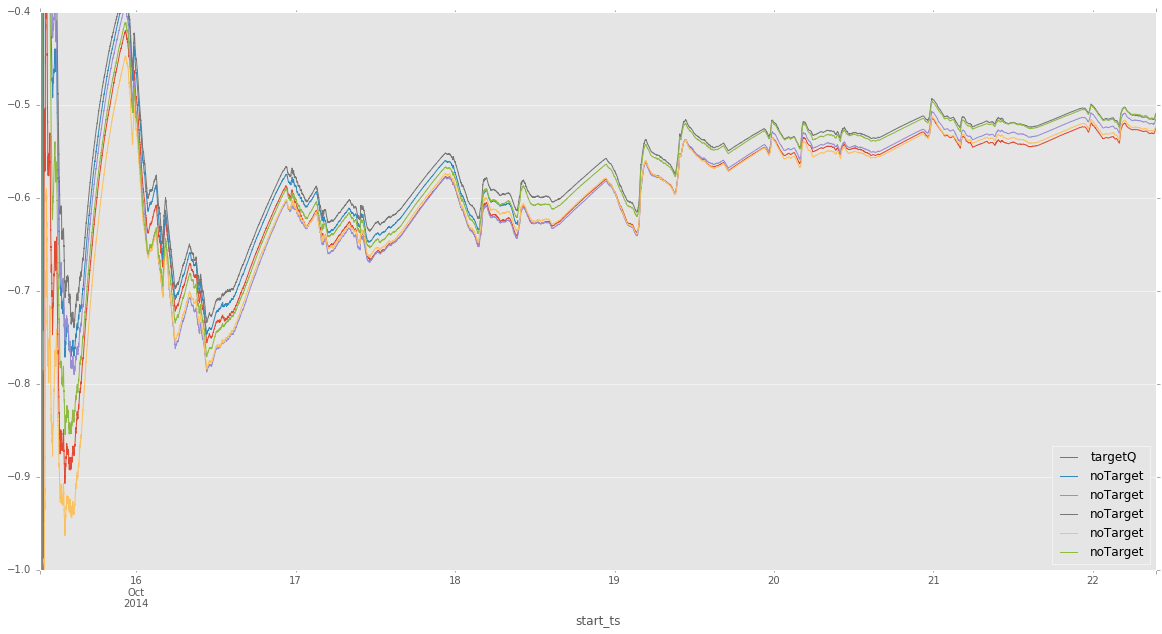

In [55]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
           ylim=(-1, -0.4),
           )

# Freeze Periods

No much difference.

In [ ]:
file_list = ['./log/index_'+file+'.csv' for file in [    
#     "message_2016-6-6_2300_TQ_U4F1.log",
#     "message_2016-6-6_2300_TQ_U4F2.log",
#     "message_2016-6-6_2300_TQ_U4F4.log",
#     "message_2016-6-6_2300_TQ_U4F8.log",
#     "message_2016-6-6_2300_TQ_U4F16.log",
#     "message_2016-6-6_2300_TQ_U16F1.log",
#     "message_2016-6-6_2300_TQ_U16F2.log",
    "message_2016-6-6_2300_TQ_U16F4.log",
    "message_2016-6-6_2300_TQ_U16F4_4.log",   
#     "message_2016-6-6_2300_TQ_U16F8.log",
    "message_2016-6-6_2300_TQ_U16F16.log",
    "message_2016-6-6_2300_TQ_U16F32.log",
    "message_2016-6-6_2300_TQ_U16F64.log",
    "message_2016-6-6_2300_TQ_U16F128.log",
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

In [ ]:
ts_name = file_list
styles = ['-']*8
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

In [ ]:
plt.figure(1)
ax = plt.subplot(111)
delta = pd.Timedelta('2 seconds')
for i, df in enumerate(df_list):
    ts = df[['q_wake', 'q_sleep']].resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

U4Fx

In [ ]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
            ylim=(-0.6, -0.4),
           )

U16FX

In [ ]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
            ylim=(-1, -0.4),
           )

# Update Periods

Seems U16 and U32 is better (and should be faster).
Does not conincide with previous results that ~10 is a good choice.

In [ ]:
file_list = ['./log/index_'+file+'.csv' for file in [
#     "message_2016-6-6_2300_TQ_U1F4.log",
#     "message_2016-6-6_2300_TQ_U2F4.log",
#     "message_2016-6-6_2300_TQ_U4F4.log",
    "message_2016-6-6_2300_TQ_U8F4.log",
    "message_2016-6-6_2300_TQ_U16F4.log",
    "message_2016-6-6_2300_TQ_U32F4.log",
    "message_2016-6-6_2300_TQ_U64F4.log",
    "message_2016-6-6_2300_TQ_U128F4.log",
        
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

In [ ]:
ts_name = file_list
styles = ['-']*8
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

In [ ]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.total_reward.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

In [ ]:
start = pd.to_datetime("2014-09-27 0:00:00")
end = pd.to_datetime("2014-09-28 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts.name = ts_name[i]
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
            ylim=(-1, -0.4),
           )